In [134]:
%load_ext watermark
%watermark -v -p numpy,scipy,sklearn,pandas,matplotlib
# 파이썬 2와 파이썬 3 지원
from __future__ import division, print_function, unicode_literals

# 공통
import numpy as np
import os

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

# 맷플롯립 설정
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
matplotlib.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

# 그림을 저장할 폴드
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
X, y = mnist["data"], mnist["target"]

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
# plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
           #interpolation="nearest")
# plt.axis("off")

save_fig("some_digit_plot")
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")
# 숫자 그림을 위한 추가 함수
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
#plot_digits(example_images, images_per_row=10)
#save_fig("more_digits_plot")
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=42)
sgd_clf.fit(X_train, y_train_5)
sgd_clf.predict([some_digit])
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    # print(n_correct / len(y_pred))
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)
y_train_perfect_predictions = y_train_5

confusion_matrix(y_train_5, y_train_perfect_predictions)
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)
y_scores = sgd_clf.decision_function([some_digit])
threshold = 0
y_some_digit_pred = (y_scores > threshold)
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="정밀도", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="재현율", linewidth=2)
    plt.xlabel("임계값", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

y_train_pred_90 = (y_scores > 70000)

def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("재현율", fontsize=16)
    plt.ylabel("정밀도", fontsize=16)
    plt.axis([0, 1, 0, 1])
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('거짓 양성 비율', fontsize=16)
    plt.ylabel('진짜 양성 비율', fontsize=16)
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")
y_scores_forest = y_probas_forest[:, 1] # 점수는 양상 클래스의 확률입니다
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
CPython 3.5.4
IPython 6.2.1

numpy 1.14.0
scipy 1.0.0
sklearn 0.20.0
pandas 0.22.0
matplotlib 2.1.2


/anaconda3/envs/mlbook/lib/python3.5/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/envs/mlbook/lib/python3.5/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


# Chapter 3. 분류
---

---
## 3.4 다중 분류

- 이진 분류기 : 두 개의 클래스를 구별<br>
- **다중 분류기**<sup>multiclass classifier</sup>(또는 **다항 분류기**<sup>multinomial classifier</sup>) : 둘 이상의 클래스를 구별<br>
 - **일대다**<sup>one-versus-all, one-versus-the-rest</sup>(OvA) 전략 : 이진 분류기를 여러 개 사용해 다중 클래스를 분류하는 기법. 이는 이미지를 분류할 때 각 분류기의 결정 점수 중에서 가장 높은 것을 클래스로 선택<br>
 - **일대일**<sup>one-versus-one</sup>(OvO) 전략 : 0과 1 구별, 0과 2 구별, 1과 2 구별 등과 같이 각 숫자의 조합마다 이진 분류기를 훈련. 클래스가 N개라면 분류기는 N*(N-1)/2개가 필요

다중 클래스 분류 작업에 이진 분류 알고리즘을 선택하면 사이킷런이 자동으로 OvA(SVM 분류기일 때는 OvO)를 적용<br>
SGDClassifier를 적용해보겠습니다.

In [5]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([5.])

이 코드는 5를 구별한 타깃 클래스(y_train_5) 대신 0에서 9까지의 원래 타깃 클래스(y_train)를 사용<br>
내부에서는 사이킷런이 실제로 10개의 이진 분류기를 훈련시키고 각각의 결정 점수를 얻어 점수가 가장 높은 클래스를 선택<br>
이를 확인하기 위해 decision_function() 메서드를 호출

In [6]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-311402.62954431, -363517.28355739, -446449.5306454 ,
        -183226.61023518, -414337.15339485,  161855.74572176,
        -452576.39616343, -471957.14962573, -518542.33997148,
        -536774.63961222]])

In [7]:
np.argmax(some_digit_scores)

5

In [8]:
sgd_clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [9]:
sgd_clf.classes_[np.argmax(some_digit_scores)]

5.0

- 사이킷런에서 OvO나 OvA을 사용하도록 강제하려면 OneVsOneClassifier나 OneVsRestClassifier를 사용

In [10]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([5.])

In [11]:
len(ovo_clf.estimators_)

45

- 아래 코드는 RandomForestClassifier를 훈련

In [12]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([5.])

- 랜덤 포레스트 분류기는 직접 샘플을 다중 클래스로 분류할 수 있기 때문에 OvA나 OvO를 적용할 필요가 없음
- predict_proba() 메서드를 호출하면 분류기가 각 샘플에 부여한 클래스별 확률을 얻을 수 있음

In [13]:
forest_clf.predict_proba([some_digit])

array([[0.1, 0. , 0. , 0.1, 0. , 0.8, 0. , 0. , 0. , 0. ]])

- 이제 교차 검증을 사용하여 분류기를 평가함<br>
cross_val_score() 함수를 사용해 SGDClassifier의 정확도를 평가 

In [14]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.84063187, 0.84899245, 0.86652998])

분류기의 성능을 더 높이기 위해 입력의 스케일을 조정함

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.91011798, 0.90874544, 0.906636  ])

---
## 3.5 에러 분석

- 모델의 성능을 향상시킬 한 가지 방법은 만들어진 에러의 종류를 분석하는 것<br>
먼저 오차 행렬을 살펴보기위해 cross_val_predict() 함수를 사용해 예측을 만들고 confusion_matrix() 함수를 호출함

In [16]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx #행은 실제 클래스, 열은 예측한 클래스

array([[5725,    3,   24,    9,   10,   49,   50,   10,   39,    4],
       [   2, 6493,   43,   25,    7,   40,    5,   10,  109,    8],
       [  51,   41, 5321,  104,   89,   26,   87,   60,  166,   13],
       [  47,   46,  141, 5342,    1,  231,   40,   50,  141,   92],
       [  19,   29,   41,   10, 5366,    9,   56,   37,   86,  189],
       [  73,   45,   36,  193,   64, 4582,  111,   30,  193,   94],
       [  29,   34,   44,    2,   42,   85, 5627,   10,   45,    0],
       [  25,   24,   74,   32,   54,   12,    6, 5787,   15,  236],
       [  52,  161,   73,  156,   10,  163,   61,   25, 5027,  123],
       [  43,   35,   26,   92,  178,   28,    2,  223,   82, 5240]])

오차 행렬을 맷플롯립의 matshow() 함수를 사용해 이미지로 표현

/anaconda3/envs/mlbook/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


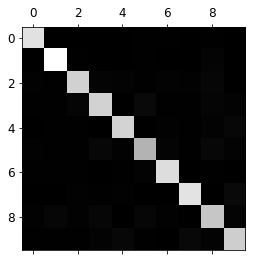

In [17]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

이 오차 행렬은 대부분의 이미지가 올바르게 분류되었음을 나타내는 주대각선에 있으므로 매우 좋음

그래프의 에러 부분에 초점을 맞추기 위해 오차 행렬의 각 값을 대응되는 클래스의 이미지 개수로 나누어 에러 비율을 비교(MNIST는 클래스별 이미지 개수가 동일하지 않음)

In [18]:
row_sums = conf_mx.sum(axis=1, keepdims=True) # column합
row_sums

array([[5923],
       [6742],
       [5958],
       [6131],
       [5842],
       [5421],
       [5918],
       [6265],
       [5851],
       [5949]])

In [19]:
norm_conf_mx = conf_mx / row_sums
norm_conf_mx

array([[9.66570994e-01, 5.06500084e-04, 4.05200068e-03, 1.51950025e-03,
        1.68833361e-03, 8.27283471e-03, 8.44166807e-03, 1.68833361e-03,
        6.58450110e-03, 6.75333446e-04],
       [2.96647879e-04, 9.63067339e-01, 6.37792940e-03, 3.70809849e-03,
        1.03826758e-03, 5.93295758e-03, 7.41619697e-04, 1.48323939e-03,
        1.61673094e-02, 1.18659152e-03],
       [8.55991944e-03, 6.88150386e-03, 8.93084928e-01, 1.74555220e-02,
        1.49378986e-02, 4.36388050e-03, 1.46022155e-02, 1.00704935e-02,
        2.78616986e-02, 2.18194025e-03],
       [7.66595988e-03, 7.50285435e-03, 2.29978796e-02, 8.71309737e-01,
        1.63105529e-04, 3.76773773e-02, 6.52422117e-03, 8.15527646e-03,
        2.29978796e-02, 1.50057087e-02],
       [3.25231085e-03, 4.96405341e-03, 7.01814447e-03, 1.71174255e-03,
        9.18521054e-01, 1.54056830e-03, 9.58575830e-03, 6.33344745e-03,
        1.47209860e-02, 3.23519343e-02],
       [1.34661502e-02, 8.30105147e-03, 6.64084117e-03, 3.56022874e-02,
   

다른 항목은 그대로 유지하고 주대각선만 0으로 채워서 그래프를 그림

/anaconda3/envs/mlbook/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


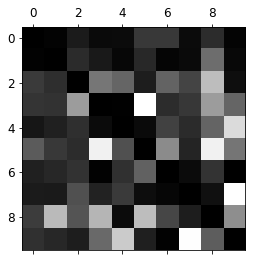

In [20]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

- 8, 9 열이 상당히 밝음 -> 많은 이미지가 8과 9로 잘못 분류되었음
- 8, 9 행도 밝음 -> 숫자 8과 9가 다른 숫자들과 혼돈
- 오차 행렬을 분석하면 분류기의 성능 향상 방안에 대한 통찰을 얻을 수 있음<br>
이 그래프를 살펴보면 3과 5가 서로 혼돈되고 8과 9를 더 잘 분류할 수 있도록 개선할 필요가 있어 보임
 - 이 숫자들에 대한 훈련 데이터를 더 모음
 - 분류기에 도움 될 만한 특성을 더 찾아봄(동심원의 수를 세는 알고리즘 - 8은 두 개, 6은 하나, 5는 0)

개개의 에러를 분석하기 위해 3과 5의 샘플을 그려보겠습니다.

/anaconda3/envs/mlbook/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


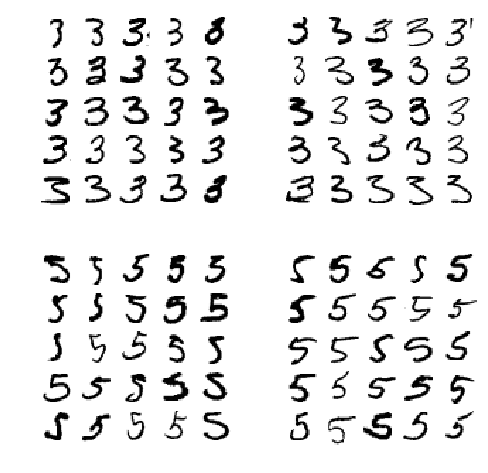

In [21]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)] #3으로 정확히 분류
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)] #5로 잘못 분류
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)] #3으로 잘못 분류
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)] #5로 정확히 분류

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

- 대부분의 잘못 분류된 이미지는 에러인 것 같고 그 원인은 선형 모델인 SGDClassifier를 사용했기 때문<br>
- 선형 분류기는 클래스마다 픽셀에 가중치를 할당하고 새로운 이미지에 대해 단순히 픽셀 강도의 가중치 합을 클래스의 점수로 계산<br>
- 따라서, 이 분류기는 이미지의 위치나 회전 방향에 매우 민감<br>
- 3과 5의 에러를 줄이는 한 가지 방법은 이미지를 중앙에 위치시키고 회전되어 있지 않도록 전처리 하는 것

---
## 3.6 다중 레이블 분류

- **다중 레이블 분류**<sup>multilabel classification</sup> : 여러 개의 이진 레이블을 출력하는 분류 시스템<br>
얼굴 인식 분류기를 예로 들면, 같은 사진에 여러 사람이 등장한다면 인식된 사람마다 레이블을 하나씩 할당해야 함(즉, '앨리스 있음, 밥 없음, 찰리 있음')

In [45]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7) #숫자가 7 이상인지
y_train_odd = (y_train % 2 == 1) #홀수인지
y_multilabel = np.c_[y_train_large, y_train_odd] #두 개의 1차원 배열을 칼럼으로 세로로 붙여서 2차원 배열 만들기
y_multilabel #다중 타깃 레이블이 담긴 배열

array([[False,  True],
       [False, False],
       [False, False],
       ...,
       [False, False],
       [False, False],
       [ True,  True]])

In [46]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

KNeighborsClassifier는 다중 레이블 분류를 지원하지만 모든 분류기가 그런 것은 아님

In [47]:
knn_clf.predict([some_digit]) #숫자 5 예측

array([[False,  True]])

다음 코드는 다중 레이블 분류기를 평가하기 위해 모든 레이블에 대한 F<sub>1</sub> 점수의 평균을 계산<br>
average="macro" 옵션은 모든 클래스의 FP, FN, TP 총합을 이용해 F<sub>1</sub> 점수를 계산

In [61]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3, verbose=3, n_jobs=-1)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed: 21.8min finished


0.97709078477525

이 코드는 모든 레이블의 가중치가 같다고 가정한 것<br>
앨리스 사진이 밥이나 찰리 사진보다 많다면 앨리스 사진에 대한 분류기의 점수에 더 높은 가중치를 둘 것. 간단한 방법은 레이블에 클래스의 **지지도**<sup>support</sup>(즉, 타깃 레이블에 속한 샘플 수)를 가중치로 줌. 이렇게 하려면 이전 코드에서 average="macro"로 설정

---
## 3.7 다중 출력 분류

- **다중 출력 다중 클래스 분류**<sup>multioutput-multiclass classification</sup>(또는 **다중 출력 분류**<sup>multioutput classification</sup>) : 다중 레이블 분류에서 한 레이블이 다중 클래스가 될 수 있도록 일반화한 것(즉, 값을 두 개 이상 가질 수 있음)

이미지에서 노이즈를 제거하는 시스템은 분류기의 출력이 다중 레이블(픽설당 한 레이블)이고 각 레이블은 여러 개의 값을 가짐(0부터 255까지 픽셀 강도). 그러므로 이는 다중 출력 분류 시스템임

In [57]:
#넘파이의 randint() 함수를 사용하여 픽셀 강도에 노이즈를 추가
noise = np.random.randint(0, 100, (len(X_train), 784)) #파라미터 : 0~99까지의 랜덤 숫자, 행렬 사이즈
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise

#타깃 이미지는 원본 이미지
y_train_mod = X_train
y_test_mod = X_test

/anaconda3/envs/mlbook/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


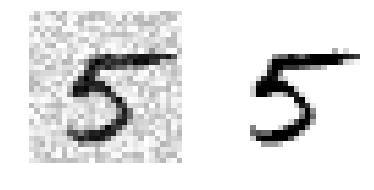

In [58]:
#테스트 세트에서 이미지를 하나 선택
some_index = 5500
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
plt.show()

/anaconda3/envs/mlbook/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


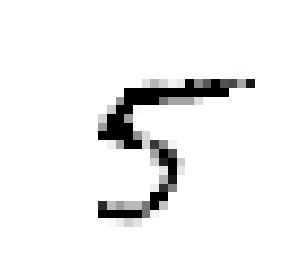

In [50]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)

---
## 3.8 연습문제

1 . MNIST 데이터넷으로 분류기를 만들어 테스트 세트에서 97% 정확도를 달성해보세요. 힌트: KNeighborsClassifier가 이 작업에 아주 잘 맞습니다. 좋은 하이퍼파라미터 값만 찾으면 됩니다.(weights와 n_neighbors 하이퍼파라미터로 그리드 탐색을 시도해보세요).

In [135]:
from sklearn.model_selection import GridSearchCV

#‘uniform’일 때는 np.mean 함수를 사용하여 단순 평균을 계산하고, ‘distance’일 때는 거리를 고려한 가중치 평균(average)을 계산
param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 623.9min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'weights': ['uniform', 'distance'], 'n_neighbors': [3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [138]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [139]:
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.9714

---

2 . MNIST 이미지를 (왼, 오른, 위, 아래) 어느 방향으로든 한 픽셀 이동시킬 수 있는 함수를 만들어보세요. 그런 다음 훈련 세트에 있는 각 이미지에 대해 네 개의 이동된 복사본(방향마다 한 개씩)을 만들어 훈련 세트에 추가하세요. 마지막으로 이 확장된 데이터셋에서 앞에서 찾은 최선의 모델을 훈련시키고 테스트 세트에서 정확도를 측정해보세요. 모델 성능이 더 높아졌는지 확인해보세요! 인위적으로 훈련 세트를 늘리는 이 기법을 **데이터 증식** 또는 **훈련 세트 확장**<sup>training set expansion</sup>이라고 합니다.

In [141]:
from scipy.ndimage.interpolation import shift

def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant") #모드가 constant이면 경계 밖의 값이 cval값으로 채워짐
    return shifted_image.reshape([-1])

X_train_augmented = [image for image in X_train] #numpy.ndarray 타입을 list 타입으로 변경
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)): #오른, 왼, 아래, 위
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy)) #이동시킨 이미지를 훈련 세트에 추가
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

어떤 학습 알고리즘은 훈련 샘플의 순서에 민감해서 많은 비슷한 샘플이 연이어 나타나면 성능이 나빠지기때문에 훈련 세트를 섞어서 모든 교차 검증 폴드가 비슷해지도록 하여 이런 문제를 방지함

In [142]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [143]:
knn_clf = KNeighborsClassifier(**grid_search.best_params_)
knn_clf.fit(X_train_augmented, y_train_augmented)
y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9763

---

3 . **타이타닉**<sup>Titanic</sup> 데이터셋에 도전해보세요. 캐글<sup>Kaggle</sup>에서 시작하면 좋습니다(https://www.kaggle.com/c/titanic).

승객의 나이, 성별, 승객 등급, 승선 위치 같은 속성을 기반으로 하여 승객의 생존 여부를 예측하는 것이 목표입니다.

데이터를 적재합니다:

In [83]:
import os

TITANIC_PATH = os.path.join("datasets", "titanic")

import pandas as pd

def load_titanic_data(filename, titanic_path=TITANIC_PATH):
    csv_path = os.path.join(titanic_path, filename)
    return pd.read_csv(csv_path)

train_data = load_titanic_data("train.csv")
test_data = load_titanic_data("test.csv")

훈련 세트에서 맨 위 몇 개의 열을 살펴 보겠습니다:

In [84]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- Survived: 타깃. 0은 생존하지 못한 것이고 1은 생존을 의미<br>
- Pclass: 승객 등급. 1, 2, 3등석<br>
- SibSp: 함께 탑승한 형제, 배우자의 수<br>
- Parch: 함께 탑승한 자녀, 부모의 수<br>
- Cabin: 객실 번호<br>
- Embarked: 승객이 탑승한 곳. C(Cherbourg), Q(Queenstown), S(Southampton)

누락된 데이터가 얼마나 되는지 알아보겠습니다:

In [85]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


- Age, Cabin, Embarked 속성의 일부가 null<br>
- 특히 Cabin은 77%가 null. 이 속성은 무시<br>
- Age는 19%가 null. null값은 중간값으로 채움<br>
- Name과 Ticket 속성은 숫자로 변환하기가 까다롭기 때문에 이 두 속성은 무시
- 변환시켜야할 범주형 특성 : Pclass, Sex, Embarked

이제 전처리 파이프라인을 만듭니다. DataFrame으로부터 특정 속성만 선택하기 위해 이전 장에서 만든 DataframeSelector를 재사용하겠습니다:

In [88]:
from sklearn.base import BaseEstimator, TransformerMixin

# 사이킷런이 DataFrame을 바로 사용하지 못하므로
# 수치형이나 범주형 컬럼을 선택하는 클래스를 만듭니다.
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

숫자 특성을 위한 파이프라인을 만듭니다:

In [91]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(["Age", "SibSp", "Parch", "Fare"])),
        ("imputer", SimpleImputer(strategy="median")),
    ])

num_pipeline.fit_transform(train_data)

array([[22.    ,  1.    ,  0.    ,  7.25  ],
       [38.    ,  1.    ,  0.    , 71.2833],
       [26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [28.    ,  1.    ,  2.    , 23.45  ],
       [26.    ,  0.    ,  0.    , 30.    ],
       [32.    ,  0.    ,  0.    ,  7.75  ]])

이제 범주형 특성을 위한 파이프라인을 만듭니다:

In [93]:
from sklearn.preprocessing import OneHotEncoder


cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(["Pclass", "Sex", "Embarked"])),
        ("imputer", SimpleImputer(strategy='most_frequent')),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])

cat_pipeline.fit_transform(train_data)

array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

마지막으로 숫자와 범주형 파이프라인을 연결합니다:

In [94]:
from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

이제 원본 데이터를 받아 머신러닝 모델에 주입할 숫자 입력 특성을 출력하는 전처리 파이프라인을 만들었습니다.

In [144]:
X_train_titanic = preprocess_pipeline.fit_transform(train_data)
X_train_titanic

array([[22.,  1.,  0., ...,  0.,  0.,  1.],
       [38.,  1.,  0., ...,  1.,  0.,  0.],
       [26.,  0.,  0., ...,  0.,  0.,  1.],
       ...,
       [28.,  1.,  2., ...,  0.,  0.,  1.],
       [26.,  0.,  0., ...,  1.,  0.,  0.],
       [32.,  0.,  0., ...,  0.,  1.,  0.]])

레이블을 가져옵니다:

In [145]:
y_train_titanic = train_data["Survived"]

이제 분류기를 훈련시킬 차례입니다. RandomForestClassifier를 적용해 보겠습니다:
최적의 하이퍼파라미터를 찾기위해 랜덤탐색을 시행

In [98]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

In [117]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=100),
        'bootstrap': [True, False],
    }

rnd_search = RandomizedSearchCV(forest_clf, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error', 
                                random_state=42, n_jobs=-1)
rnd_search.fit(X_train_titanic, y_train_titanic)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=50, n_jobs=-1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a162e05f8>, 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [118]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.44064028507448966 {'n_estimators': 52, 'bootstrap': True}
0.4519567135595372 {'n_estimators': 15, 'bootstrap': True}
0.4393649125440716 {'n_estimators': 72, 'bootstrap': True}
0.4431800195652587 {'n_estimators': 21, 'bootstrap': True}
0.4393649125440716 {'n_estimators': 83, 'bootstrap': True}
0.4393649125440716 {'n_estimators': 75, 'bootstrap': True}
0.4393649125440716 {'n_estimators': 88, 'bootstrap': True}
0.4494665749754947 {'n_estimators': 24, 'bootstrap': True}
0.4519567135595372 {'n_estimators': 22, 'bootstrap': True}
0.47614237371283535 {'n_estimators': 2, 'bootstrap': True}
0.45071336398632533 {'n_estimators': 30, 'bootstrap': False}
0.45071336398632533 {'n_estimators': 2, 'bootstrap': False}
0.4519567135595372 {'n_estimators': 60, 'bootstrap': False}
0.4419119768530779 {'n_estimators': 33, 'bootstrap': True}
0.45071336398632533 {'n_estimators': 58, 'bootstrap': False}
0.4519567135595372 {'n_estimators': 89, 'bootstrap': False}
0.44064028507448966 {'n_estimators': 91, 'bootst

In [119]:
rnd_search.best_params_

{'bootstrap': True, 'n_estimators': 72}

이를 사용해서 테스트 세트에 대한 예측을 만듭니다:

In [146]:
forest_clf = RandomForestClassifier(bootstrap= True, n_estimators= 72, random_state=42)
forest_clf.fit(X_train_titanic, y_train_titanic)

X_test_titanic = preprocess_pipeline.transform(test_data)
X_test_predict = forest_clf.predict(X_test_titanic)
X_test_predict

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

이 예측 결과를 CSV 파일로 만들어 캐글에 업로드하고 평가를 받아볼 수 있습니다. 하지만 교차 검증으로 모델이 얼마나 좋은지 먼저 평가하겠습니다.

In [123]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

0.817174838270344

In [169]:
df = pd.DataFrame(test_data['PassengerId'])
df.loc[:,'Survived'] = pd.Series(X_test_predict, index = df.index)
df.to_csv("titanic_predict.csv", index=None)

In [170]:
df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0
